In [1]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:
import fnmatch
UPPER_FOLDER = "../nov29_135_mixtures_early_stop_skip3/" #../"#"../nov16_rescaled_inputs/"#nov15_half_training_rate_skip5/"#"../nov14_half_training_rate_skip5/" # "../"
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(UPPER_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(UPPER_FOLDER+folder)
            else:
                all_models[num_mixtures] = [UPPER_FOLDER+folder]
            
    return all_models
            
print(get_all_models())

{5: ['../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run8', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run9', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run11', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run14', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run3', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run7', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run23', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run15', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run6', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run12', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run25', '../nov29_135_mixtures_early_

In [3]:
#Getting training history

training_histories = {}
filename = "training_history.h5"
model_name = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    training_histories[key] = []
    for folder_name in val:
        if model_name not in os.listdir(folder_name):
            print("Unfinished run. Skipping.")
            continue
        training_histories[key].append(folder_name+"/"+filename)

print("histories: ", training_histories)

histories:  {5: ['../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run8/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run9/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run11/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run14/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run3/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run7/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run23/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run15/training_history.h5', '../nov29_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run6/t

In [4]:
#Note: with early stopping, the total number of epochs varies.
#How do we plot loss then?
import pickle
loss_summary = []
max_length = 0
for num_mixtures, history_files in training_histories.items():
    for history_file in history_files:
        with open(history_file, 'rb') as file:
            content=pickle.load(file)
            content['num_mixtures'] = num_mixtures
            loss_summary.append(content)
            if len(content['loss']) > max_length:
                max_length = len(content['loss'])
#print(loss_summary)
import pandas as pd
l_frame = pd.DataFrame(loss_summary)
print("Any NaNs?")
print(l_frame.isnull().values.any())
print([l['loss'] for l in loss_summary if l['num_mixtures'] == 5])

Any NaNs?
False
[[-32.68317376097224, -78.77530348615068, -84.99998074156417, -89.51347536145194, -91.88311803474727, -93.71538448098377, -95.04122462522052, -96.57981539710238, -97.57798005911815, -98.68953315012679, -99.59658371845103, -100.48905636818012, -101.2171067707896, -101.84700495991184, -102.54196297823458, -102.97714708800643, -103.72011652289659, -104.15119934021293, -104.65040873790298, -105.06816684712878, -105.42530207713313, -105.8338636615912, -106.14854421373404, -106.5774112935564, -106.84179990404152, -107.15506660626028, -107.53313323960032, -107.74840123641454, -108.03526998513368, -108.32241828759929, -108.55917387613776, -108.86112207303846, -109.01914167043539, -109.32346071641581, -109.612041559334, -109.89521368266803, -109.99311850479232, -110.35559834098467, -110.53026285680956, -110.742304594594, -110.89989926308054, -111.22022295601761, -111.43738661715108, -111.50597618533665, -111.61398308869903, -112.01504495100045, -112.11997782061334, -112.36384506

In [5]:
#Adjusting the loss lists so all have same length. That way, we can
#Plot the variance between them.
#TODO Not sure what is the best method here. I will try to just 
#append final loss values to all to make them same length.
extended_loss_summary = []
for l in loss_summary:
    current_solution={}
    for key, val in l.items():
        if key=="num_mixtures":
            current_solution[key] = val
        else:
            extended_list = val
            while(len(extended_list) < max_length):
                extended_list.append(extended_list[-1])
            current_solution[key] = extended_list
    extended_loss_summary.append(current_solution)
print(extended_loss_summary)
loss_summary = extended_loss_summary
    

[{'val_loss': [-69.05251945357077, -81.92678875426799, -86.93955808918949, -90.37413461912548, -92.04652836288636, -93.26097924510077, -94.62353263090063, -95.10879442260783, -96.74799225259636, -97.75660040199226, -98.62540666643227, -98.95951321499585, -99.87399537041422, -100.21476493758871, -101.02033832929067, -101.00436660613445, -102.16826218871451, -102.23416283795594, -101.551181696415, -102.96619161027414, -103.4619420770998, -103.65058451848596, -103.46110288672266, -104.57329002888882, -104.69196712020232, -104.75053166305251, -105.18638169871681, -105.097112644239, -105.10874016072256, -105.68063703825015, -105.56190970151847, -106.18749466622118, -106.23155423120593, -106.08781415122571, -106.37482318854512, -106.43605545455229, -107.02626577686857, -107.10311290620076, -107.41756988934954, -107.02454639252835, -107.392216614568, -107.82970779778603, -107.83067442064855, -108.01244190939252, -108.09229494015044, -108.38718433838304, -108.34952880559946, -108.4218338750940

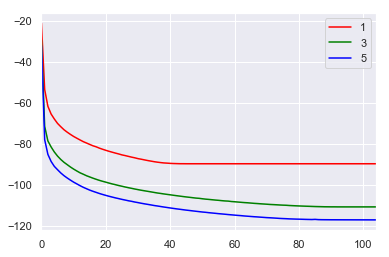

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 1], color="red", condition="1")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 3], color="green", condition="3")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 5], color="blue", condition="5")
#sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 8], color="black", condition="8")
#sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 16], color="pink", condition="16")
plt.legend()
# It looks like there are no confidence intervals here, but I wonder if they are just
# too narrow to be seen? Extremely stable behaviors.

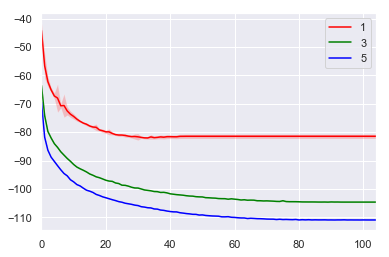

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.tsplot([l['val_loss'] for l in loss_summary if l['num_mixtures'] == 1], ci='sd', color="red", condition="1")
sns.tsplot([l['val_loss'] for l in loss_summary if l['num_mixtures'] == 3], color="green", condition="3")
sns.tsplot([l['val_loss'] for l in loss_summary if l['num_mixtures'] == 5], color="blue", condition="5")
#sns.tsplot([l['val_loss'] for l in loss_summary if l['num_mixtures'] == 8], color="black", condition="8")
#sns.tsplot([l['val_loss'] for l in loss_summary if l['num_mixtures'] == 16], color="pink", condition="16")
plt.legend()
# It looks like there are no confidence intervals here, but I wonder if they are just
# too narrow to be seen? Extremely stable behaviors.